# Lack of understanding of the data

i didnt to understand the data,so I'm trying to find the best futures to predict


In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('hitters.csv')
dataset

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [2]:
dataset.iloc[:, 2:].replace(0, np.nan, inplace=True)
dataset = dataset.dropna()

In [3]:
dataset = dataset.to_numpy()
dataset

array([[315, 81, 7, ..., 10, 475.0, 'N'],
       [479, 130, 18, ..., 14, 480.0, 'A'],
       [496, 141, 20, ..., 3, 500.0, 'N'],
       ...,
       [475, 126, 3, ..., 7, 385.0, 'A'],
       [573, 144, 9, ..., 12, 960.0, 'A'],
       [631, 170, 9, ..., 3, 1000.0, 'A']], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
dataset[:, 13] = LabelEncoder().fit_transform(dataset[:, 13])
dataset[:, 14] = LabelEncoder().fit_transform(dataset[:, 14])
dataset

array([[315, 81, 7, ..., 10, 475.0, 'N'],
       [479, 130, 18, ..., 14, 480.0, 'A'],
       [496, 141, 20, ..., 3, 500.0, 'N'],
       ...,
       [475, 126, 3, ..., 7, 385.0, 'A'],
       [573, 144, 9, ..., 12, 960.0, 'A'],
       [631, 170, 9, ..., 3, 1000.0, 'A']], dtype=object)

In [5]:
dataset[:, 19] = LabelEncoder().fit_transform(dataset[:, 19])
dataset

array([[315, 81, 7, ..., 10, 475.0, 1],
       [479, 130, 18, ..., 14, 480.0, 0],
       [496, 141, 20, ..., 3, 500.0, 1],
       ...,
       [475, 126, 3, ..., 7, 385.0, 0],
       [573, 144, 9, ..., 12, 960.0, 0],
       [631, 170, 9, ..., 3, 1000.0, 0]], dtype=object)

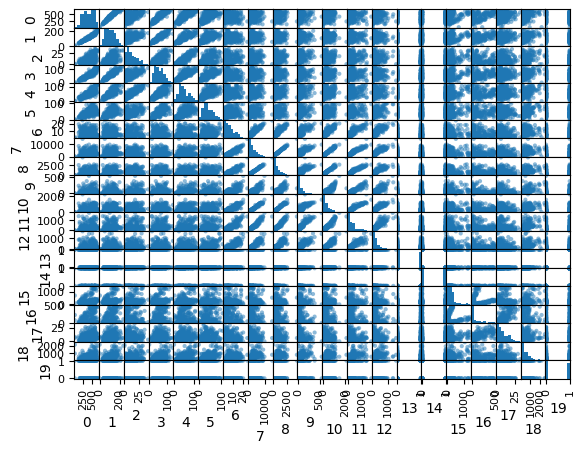

In [6]:
import matplotlib.pyplot as plt
dataset = dataset.astype(int)
dataset = pd.DataFrame(dataset)
pd.plotting.scatter_matrix(dataset)
plt.show()

In [7]:
dataset = dataset.to_numpy()

In [8]:
y = dataset[:, 18]
x = dataset[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]]
print(x)
print(y)

[[315  81   7 ...  43  10   1]
 [479 130  18 ...  82  14   0]
 [496 141  20 ...  11   3   1]
 ...
 [475 126   3 ... 113   7   0]
 [573 144   9 ... 131  12   0]
 [631 170   9 ...   4   3   0]]
[ 475  480  500   91  750   70  100   75 1100  517  512  550  700  240
  775  175  135  100  115  600  776  765  708  750  625  900  110  612
  300  850   90   67  180  305  215  247  815  875   70 1200  675  415
  340  416 1350   90  275  230  225  950   75  105  320  850  535  933
  850  210  325  275  450 1975 1900  600 1041  110  260  475  431 1220
   70  145  595 1861  300  490 2460  375  750 1175   70 1500  385 1925
  215  900  155  700  535  362  733  200  400  400  737  500  600  662
  950  750  297  325   87  175   90 1237  430  100  165  250 1300  773
 1008  275  775  850  365   95  110  100  277   80  600  200  657   75
 2412  250  155  640  300  110  825  195  450  630   86 1300 1000 1800
 1310  737  625  125 1043  725  300  365   75 1183  202  225  525  265
  787  800  587  145  420  

In [9]:
print(x.shape, y.shape)

(263, 19) (263,)


In [10]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
predictions = lof.fit_predict(x)
outliers = np.where(predictions == -1)[0]
x = x[~np.isin(np.arange(len(x)), outliers), :]
y = y[~np.isin(np.arange(len(y)), outliers)]
print(x.shape, y.shape)

(236, 19) (236,)


In [11]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)
X_selected = selector.fit_transform(x, y)
print(selector.get_support())
print(selector.get_support(indices=True))

[ True  True False False False False False  True  True  True  True  True
  True False False  True  True False False]
[ 0  1  7  8  9 10 11 12 15 16]


In [12]:
new_x = x[:, list(selector.get_support(indices=True))]
new_x

array([[ 315,   81, 3449, ...,  375,  632,   43],
       [ 496,  141, 5628, ...,  354,  200,   11],
       [ 594,  169, 4408, ...,  194,  282,  421],
       ...,
       [ 492,  136, 5511, ...,  875,  313,  381],
       [ 475,  126, 1700, ...,  146,   37,  113],
       [ 631,  170, 4908, ...,  249,  408,    4]])

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, random_state=7)


standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
power_transform = PowerTransformer()
robust_scaler = RobustScaler()
model = LinearRegression()

pipline = Pipeline(
    steps=[
        ('power', power_transform),
        ('robust', robust_scaler),
        # ('minmax', min_max_scaler),
        # ('standard', standard_scaler),
        ('model', model)
    ]
)

grid_params = {
    # 'power__method': ['yeo-johnson', 'box-cox'],

}

grid_search = GridSearchCV(
    pipline,
    grid_params,
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(
    f"Best Params: {grid_search.best_params_}\n",
    grid_search.best_estimator_,
    f"\nbest Score: {grid_search.score(x_test, y_test)}"
)

Best Params: {}
 Pipeline(steps=[('power', PowerTransformer()), ('robust', RobustScaler()),
                ('model', LinearRegression())]) 
best Score: 0.6143195322967872


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.linear_model import Lasso
robust_scaler = RobustScaler()
nx = robust_scaler.fit_transform(x)
power_transform = PowerTransformer()
nx = power_transform.fit_transform(nx)

lasso = Lasso(alpha=0.1, random_state=7)
lasso.fit(nx, y)
lasso_coef = lasso.coef_

print(lasso_coef)

[ 1.13688065e+01  2.51029743e+01  8.69065605e+00 -7.62056269e+01
 -1.98071688e+01  8.99093145e+01 -3.82146011e+01 -1.26021241e+03
  6.08798514e+02 -1.16974614e+02  6.22736657e+02  5.31168633e+02
 -7.88373306e+01 -1.60165067e-01 -2.61613325e+01  6.97227832e+01
  1.09933640e+01  2.48071741e+01  1.86671251e+00]


C:\Users\atila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.572e+05, tolerance: 4.383e+03
  model = cd_fast.enet_coordinate_descent(


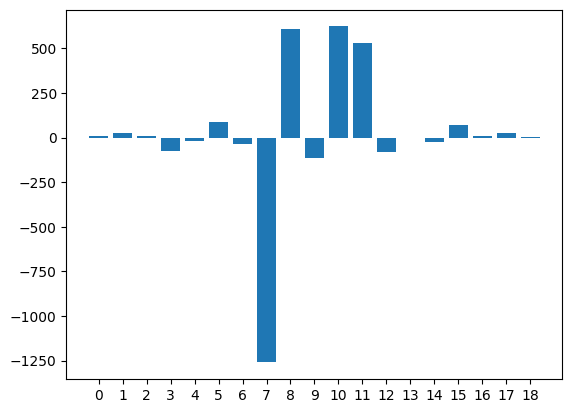

In [15]:
plt.bar(np.arange(len(lasso_coef)), lasso_coef)
plt.xticks(np.arange(len(lasso_coef)))
plt.show()

we doing it with Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(nx, y)
lr_coef = lr.coef_


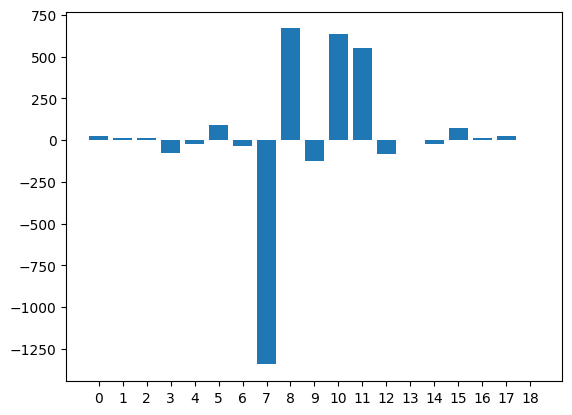

In [17]:
plt.bar(np.arange(len(lr_coef)), lr_coef)
plt.xticks(np.arange(len(lr_coef)))
plt.show()

In [18]:
x = x[:, [1, 4, 5, 8, 9, 10, 13, 15, 16, 17]]

In [19]:
x

array([[ 81,  38,  39, ..., 632,  43,  10],
       [141,  78,  37, ..., 200,  11,   3],
       [169,  51,  35, ..., 282, 421,  25],
       ...,
       [136,  50,  94, ..., 313, 381,  20],
       [126,  43,  52, ...,  37, 113,   7],
       [170,  44,  31, ..., 408,   4,   3]])

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LinearRegression


standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
power_transform = PowerTransformer()
robust_scaler = RobustScaler()
model = LinearRegression()

pipline = Pipeline(
    steps=[
        ('power', power_transform),
        ('robust', robust_scaler),
        # ('minmax', min_max_scaler),
        # ('standard', standard_scaler),
        ('model', model)
    ]
)

grid_params = {
    # 'power__method': ['yeo-johnson', 'box-cox'],

}

grid_search = GridSearchCV(
    pipline,
    grid_params,
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(
    f"Best Params: {grid_search.best_params_}\n",
    grid_search.best_estimator_,
    f"\nbest Score: {grid_search.score(x_test, y_test)}"
)

Best Params: {}
 Pipeline(steps=[('power', PowerTransformer()), ('robust', RobustScaler()),
                ('model', LinearRegression())]) 
best Score: 0.6241892186910749


In [22]:
x

array([[ 81,  38,  39, ..., 632,  43,  10],
       [141,  78,  37, ..., 200,  11,   3],
       [169,  51,  35, ..., 282, 421,  25],
       ...,
       [136,  50,  94, ..., 313, 381,  20],
       [126,  43,  52, ...,  37, 113,   7],
       [170,  44,  31, ..., 408,   4,   3]])

In [23]:
robust_scaler = RobustScaler()
nx = robust_scaler.fit_transform(x)
power_transform = PowerTransformer()
nx = power_transform.fit_transform(nx)

lasso = Lasso(alpha=0.1, random_state=7)
lasso.fit(nx, y)
lasso_coef = lasso.coef_

print(lasso_coef)

[ 36.09059906  24.24908677  56.15045552  -0.          39.07304159
 224.20990949  10.84567006  64.64344302  -8.04129575  16.41998786]


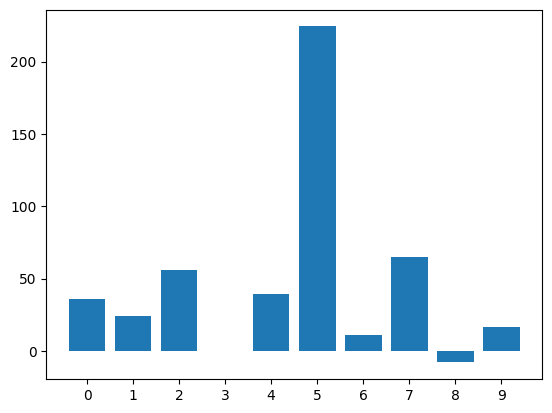

In [24]:
plt.bar(np.arange(len(lasso_coef)), lasso_coef)
plt.xticks(np.arange(len(lasso_coef)))
plt.show()